In [15]:
import pandas as pd
from pandas import DataFrame
from sklearn.model_selection import train_test_split, cross_validate
from sklearn.metrics import classification_report
from random import seed    # Set random seed for reproducible results

In [16]:
seed(110717)    # Set the seed
titanic = pd.read_csv("titanic.csv")
titanic_train, titanic_test = train_test_split(titanic)

In [19]:
from sklearn.ensemble import RandomForestClassifier

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [20]:
forest1 = RandomForestClassifier(n_estimators=10,    # Number of trees to grow
                                 max_depth=5)        # Maximum depth of a tree
forest1.fit(X=titanic_train.replace({'Sex': {'male': 0, 'female': 1}}    # Replace strings with numbers
                                   ).drop(["Survived", "Name"], axis=1),
            y=titanic_train.Survived)

# Example prediction
forest1.predict([[2, 0, 26, 0, 0, 30]])

array([0], dtype=int64)

In [21]:
pred1 = forest1.predict(titanic_train.replace({'Sex': {'male': 0, 'female': 1}}
                                             ).drop(["Survived", "Name"], axis=1))
print(classification_report(titanic_train.Survived, pred1))

             precision    recall  f1-score   support

          0       0.84      0.94      0.89       418
          1       0.88      0.70      0.78       247

avg / total       0.86      0.85      0.85       665



In [22]:
n_candidate = [10, 20, 30, 40, 60, 80, 100]    # Candidate forest sizes
res1 = dict()

for n in n_candidate:
    pred3 = RandomForestClassifier(n_estimators=n, max_depth=5)
    res1[n] = cross_validate(pred3,
                            X=titanic_train.replace({'Sex': {'male': 0, 'female': 1}}    # Replace strings with numbers
                                         ).drop(["Survived", "Name"], axis=1),
                            y=titanic_train.Survived,
                            cv=10,
                            return_train_score=False,
                            scoring='accuracy')

res1df = DataFrame({(i, j): res1[i][j]
                             for i in res1.keys()
                             for j in res1[i].keys()}).T

res1df.loc[(slice(None), 'test_score'), :]

,,0,1,2,3,4,5,6,7,8,9
10,test_score,0.820896,0.746269,0.820896,0.791045,0.776119,0.791045,0.895522,0.863636,0.784615,0.861538
20,test_score,0.791045,0.776119,0.835821,0.820896,0.791045,0.820896,0.850746,0.848485,0.769231,0.861538
30,test_score,0.805970,0.761194,0.820896,0.805970,0.820896,0.850746,0.820896,0.803030,0.769231,0.846154
40,test_score,0.791045,0.731343,0.805970,0.835821,0.805970,0.820896,0.865672,0.803030,0.769231,0.830769
60,test_score,0.820896,0.761194,0.820896,0.805970,0.776119,0.850746,0.865672,0.848485,0.769231,0.830769
80,test_score,0.791045,0.746269,0.835821,0.805970,0.820896,0.835821,0.865672,0.818182,0.800000,0.830769
100,test_score,0.820896,0.731343,0.820896,0.805970,0.776119,0.820896,0.880597,0.833333,0.784615,0.846154


In [23]:
res1df.loc[(slice(None), 'test_score'), :].mean(axis=1)

10   test_score    0.815158
20   test_score    0.816582
30   test_score    0.810498
40   test_score    0.805975
60   test_score    0.814998
80   test_score    0.815044
100  test_score    0.812082
dtype: float64

In [26]:
res1df.loc[(slice(None), 'test_score'), :].mean(axis=1)

10   test_score    0.815158
20   test_score    0.816582
30   test_score    0.810498
40   test_score    0.805975
60   test_score    0.814998
80   test_score    0.815044
100  test_score    0.812082
dtype: float64

In [27]:
m_candidate = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]    # Candidate depths

In [28]:
res2 = dict()

for m in m_candidate:
    pred3 = RandomForestClassifier(max_depth=m, n_estimators=40)
    res2[m] = cross_validate(pred3,
                             X=titanic_train.replace({'Sex': {'male': 0, 'female': 1}}    # Replace strings with numbers
                                          ).drop(["Survived", "Name"], axis=1),
                             y=titanic_train.Survived,
                             cv=10,
                             return_train_score=False,
                             scoring='accuracy')

res2df = DataFrame({(i, j): res2[i][j]
                             for i in res2.keys()
                             for j in res2[i].keys()}).T

res2df.loc[(slice(None), 'test_score'), :]

,,0,1,2,3,4,5,6,7,8,9
1,test_score,0.746269,0.716418,0.746269,0.686567,0.746269,0.761194,0.731343,0.833333,0.723077,0.846154
2,test_score,0.731343,0.731343,0.761194,0.701493,0.805970,0.791045,0.865672,0.833333,0.723077,0.830769
3,test_score,0.791045,0.761194,0.761194,0.716418,0.761194,0.820896,0.865672,0.803030,0.753846,0.830769
4,test_score,0.805970,0.761194,0.791045,0.805970,0.820896,0.820896,0.850746,0.833333,0.707692,0.861538
5,test_score,0.776119,0.791045,0.820896,0.805970,0.776119,0.850746,0.850746,0.833333,0.800000,0.830769
6,test_score,0.820896,0.746269,0.865672,0.805970,0.805970,0.820896,0.880597,0.848485,0.753846,0.846154
7,test_score,0.835821,0.746269,0.835821,0.820896,0.791045,0.791045,0.835821,0.848485,0.784615,0.846154
8,test_score,0.805970,0.761194,0.880597,0.835821,0.761194,0.805970,0.850746,0.848485,0.738462,0.815385
9,test_score,0.850746,0.761194,0.865672,0.865672,0.805970,0.835821,0.835821,0.833333,0.753846,0.800000
10,test_score,0.820896,0.791045,0.865672,0.865672,0.820896,0.805970,0.880597,0.803030,0.738462,0.784615


In [29]:
res2df.loc[(slice(None), 'test_score'), :].mean(axis=1)

1   test_score    0.753689
2   test_score    0.777524
3   test_score    0.786526
4   test_score    0.805928
5   test_score    0.813574
6   test_score    0.819475
7   test_score    0.813597
8   test_score    0.810382
9   test_score    0.820808
10  test_score    0.817685
dtype: float64

In [30]:
forest2 = RandomForestClassifier(max_depth=9, n_estimators=40)
forest2.fit(X=titanic_train.replace({'Sex': {'male': 0, 'female': 1}}    # Replace strings with numbers
                                   ).drop(["Survived", "Name"], axis=1),
            y=titanic_train.Survived)

survived_test_predict = forest2.predict(X=titanic_test.replace(
    {'Sex': {'male': 0, 'female': 1}}
).drop(["Survived", "Name"], axis=1))

In [31]:
print(classification_report(titanic_test.Survived, survived_test_predict))

             precision    recall  f1-score   support

          0       0.82      0.94      0.88       127
          1       0.90      0.73      0.80        95

avg / total       0.85      0.85      0.84       222



In [32]:
import pandas as pd
from pandas import DataFrame
from sklearn.model_selection import train_test_split, cross_validate
from sklearn.metrics import classification_report

In [33]:
titanic = pd.read_csv("titanic.csv")
titanic.head()

,Survived,Pclass,Name,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
0,0,3,Mr. Owen Harris Braund,male,22.0,1,0,7.2500
1,1,1,Mrs. John Bradley (Florence Briggs Thayer) Cum...,female,38.0,1,0,71.2833
2,1,3,Miss. Laina Heikkinen,female,26.0,0,0,7.9250
3,1,1,Mrs. Jacques Heath (Lily May Peel) Futrelle,female,35.0,1,0,53.1000
4,0,3,Mr. William Henry Allen,male,35.0,0,0,8.0500


In [35]:
pd.cut(titanic.Age, bins=[-1, 2, titanic.Age.max() + 1]).head()

0    (2.0, 81.0]
1    (2.0, 81.0]
2    (2.0, 81.0]
3    (2.0, 81.0]
4    (2.0, 81.0]
Name: Age, dtype: category
Categories (2, interval[float64]): [(-1.0, 2.0] < (2.0, 81.0]]

In [36]:
pd.cut(titanic.Fare, bins=[0, 23.35, titanic.Fare.max() + 1]).head()

0        (0.0, 23.35]
1    (23.35, 513.329]
2        (0.0, 23.35]
3    (23.35, 513.329]
4        (0.0, 23.35]
Name: Fare, dtype: category
Categories (2, interval[float64]): [(0.0, 23.35] < (23.35, 513.329]]

In [38]:
titanic = titanic.assign(Age_cat=(titanic.Age <= 2), Fare_cat=(titanic.Fare <= 23.35))
titanic.replace({'Sex': {'male': 0, 'female': 1}}, inplace=True)
titanic.drop(['Age', 'Fare', 'Name'], axis=1, inplace=True)
titanic.head()

,Survived,Pclass,Sex,Siblings/Spouses Aboard,Parents/Children Aboard,Age_cat,Fare_cat
0,0,3,0,1,0,False,True
1,1,1,1,1,0,False,False
2,1,3,1,0,0,False,True
3,1,1,1,1,0,False,False
4,0,3,0,0,0,False,True


In [39]:
titanic_train, titanic_test = train_test_split(titanic)
titanic_train.head()

,Survived,Pclass,Sex,Siblings/Spouses Aboard,Parents/Children Aboard,Age_cat,Fare_cat
609,1,3,1,1,0,False,True
371,0,1,0,0,0,False,False
846,0,3,0,4,2,False,False
355,0,2,1,0,0,False,True
533,0,1,0,0,0,False,False


In [40]:
from sklearn.naive_bayes import BernoulliNB

In [41]:
bnb = BernoulliNB(alpha=0,    # Additive smoothing parameter; setting to 0 for no smoothing
                  fit_prior=False,     # Don't learn a prior distribution for the label
                  class_prior=None)    # Don't have prior distributions for features
bnb = bnb.fit(titanic_train.drop("Survived", axis=1), titanic_train.Survived)
print(classification_report(titanic_train.Survived, bnb.predict(titanic_train.drop("Survived", axis=1))))

             precision    recall  f1-score   support

          0       0.82      0.78      0.80       411
          1       0.67      0.72      0.69       254

avg / total       0.76      0.76      0.76       665



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\naive_bayes.py:472: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  'setting alpha = %.1e' % _ALPHA_MIN)


In [42]:
survived_test_predict = bnb.predict(titanic_test.drop("Survived", axis=1))
print(classification_report(titanic_test.Survived, survived_test_predict))

             precision    recall  f1-score   support

          0       0.81      0.78      0.80       134
          1       0.69      0.73      0.71        88

avg / total       0.76      0.76      0.76       222



In [43]:
import pandas as pd
from pandas import DataFrame
from sklearn.model_selection import train_test_split, cross_validate
from sklearn.metrics import classification_report
from random import seed

In [44]:
seed(110717)

titanic = pd.read_csv("titanic.csv")
titanic.replace({'Sex': {'male': 0, 'female': 1}}, inplace=True)
titanic.drop("Name", axis=1, inplace=True)
titanic.head()

,Survived,Pclass,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
0,0,3,0,22.0,1,0,7.2500
1,1,1,1,38.0,1,0,71.2833
2,1,3,1,26.0,0,0,7.9250
3,1,1,1,35.0,1,0,53.1000
4,0,3,0,35.0,0,0,8.0500


In [45]:
pd.get_dummies(titanic.Pclass).head()

,1,2,3
0,0,0,1
1,1,0,0
2,0,0,1
3,1,0,0
4,0,0,1


In [46]:
titanic = titanic.join(pd.get_dummies(titanic.Pclass, prefix='Pclass')).drop("Pclass", axis=1)
titanic.head()

,Survived,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare,Pclass_1,Pclass_2,Pclass_3
0,0,0,22.0,1,0,7.2500,0,0,1
1,1,1,38.0,1,0,71.2833,1,0,0
2,1,1,26.0,0,0,7.9250,0,0,1
3,1,1,35.0,1,0,53.1000,1,0,0
4,0,0,35.0,0,0,8.0500,0,0,1


In [47]:
titanic_train, titanic_test = train_test_split(titanic)
titanic_train.head()

,Survived,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare,Pclass_1,Pclass_2,Pclass_3
372,0,1,3.0,3,1,21.0750,0,0,1
790,0,0,25.0,0,0,7.8958,0,0,1
234,0,1,21.0,0,0,7.5500,0,0,1
572,0,0,19.0,0,0,14.5000,0,0,1
270,1,1,41.0,0,1,19.5000,0,1,0


In [48]:
from sklearn.svm import SVC

In [49]:
svm1 = SVC(C=1.0,              # Penalty parameter C
           kernel='linear')    # Using a linear kernel
svm1.fit(X=titanic_train.drop("Survived", axis=1), y=titanic_train.Survived)

svm1.predict([[0, 26, 0, 0, 30, 0, 1, 0]])    # Predicting whether a 26 year old male without family aboard in second
                                              # class who paid $30 fare would survive

array([0], dtype=int64)

In [50]:
print(classification_report(titanic_train.Survived, svm1.predict(titanic_train.drop("Survived", axis=1))))

             precision    recall  f1-score   support

          0       0.83      0.85      0.84       419
          1       0.73      0.70      0.71       246

avg / total       0.79      0.79      0.79       665



In [51]:
survived_test_predict = svm1.predict(titanic_test.drop("Survived", axis=1))
print(classification_report(titanic_test.Survived, survived_test_predict))

             precision    recall  f1-score   support

          0       0.76      0.85      0.80       126
          1       0.77      0.65      0.70        96

avg / total       0.76      0.76      0.76       222



In [52]:
import pandas as pd
from pandas import DataFrame
from sklearn.model_selection import train_test_split, cross_validate
from sklearn.metrics import classification_report

In [53]:
titanic = pd.read_csv("titanic.csv")
titanic.replace({'Sex': {'male': 0, 'female': 1}}, inplace=True)
titanic.drop("Name", axis=1, inplace=True)
titanic = titanic.join(pd.get_dummies(titanic.Pclass, prefix='Pclass')).drop("Pclass", axis=1)
titanic_train, titanic_test = train_test_split(titanic)
titanic_train.head()

,Survived,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare,Pclass_1,Pclass_2,Pclass_3
649,0,0,21.0,0,0,8.4333,0,0,1
150,1,1,22.0,1,0,66.6000,1,0,0
458,0,0,34.0,0,0,8.0500,0,0,1
645,0,0,21.0,0,0,7.5500,0,0,1
475,0,0,22.0,0,0,7.5208,0,0,1


In [54]:
from sklearn.linear_model import LogisticRegression

In [55]:
logit = LogisticRegression()
logit.fit(X=titanic_train.drop("Survived", axis=1),
          y=titanic_train.Survived)
logit.predict([[0, 26, 0, 0, 30, 0, 1, 0]])     # Example prediction

array([0], dtype=int64)

In [56]:
logit.predict_proba([[0, 26, 0, 0, 30, 0, 1, 0]])    # What is the probability of belonging to certain classes?

array([[0.6901021, 0.3098979]])

In [58]:
print(classification_report(titanic_train.Survived, logit.predict(titanic_train.drop("Survived", axis=1))))

             precision    recall  f1-score   support

          0       0.82      0.88      0.85       409
          1       0.78      0.68      0.73       256

avg / total       0.80      0.80      0.80       665



In [59]:
print(classification_report(titanic_test.Survived, logit.predict(titanic_test.drop("Survived", axis=1))))

             precision    recall  f1-score   support

          0       0.80      0.87      0.83       136
          1       0.76      0.66      0.71        86

avg / total       0.79      0.79      0.79       222



In [60]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split, cross_validate
from sklearn.metrics import classification_report

In [61]:
iris_obj = load_iris()
flower, species = iris_obj.data, iris_obj.target
flower_train, flower_test, species_train, species_test = train_test_split(flower, species, test_size = 0.1)
flower_train[:5, :]

array([[6.5, 2.8, 4.6, 1.5],
       [5.1, 3.5, 1.4, 0.3],
       [6.4, 2.8, 5.6, 2.1],
       [5. , 2.3, 3.3, 1. ],
       [5. , 3.5, 1.6, 0.6]])

In [62]:
species_train[:5]

array([1, 0, 2, 1, 0])

In [63]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus

In [64]:
tree = DecisionTreeClassifier(max_depth=3)
tree = tree.fit(flower_train, species_train)
print(classification_report(species_test, tree.predict(flower_test)))

             precision    recall  f1-score   support

          0       1.00      1.00      1.00         4
          1       1.00      0.83      0.91         6
          2       0.83      1.00      0.91         5

avg / total       0.94      0.93      0.93        15



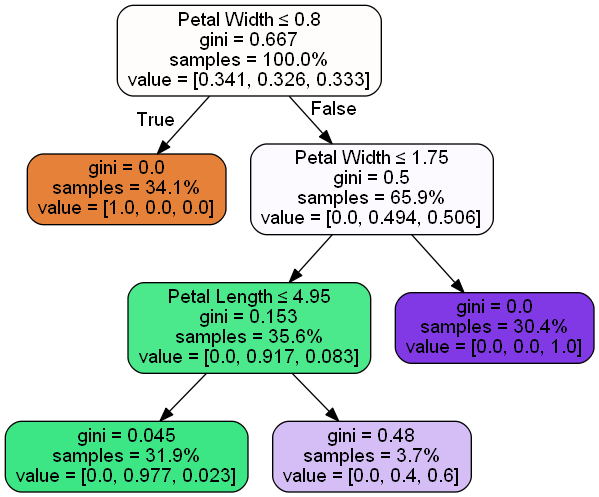

In [65]:
dot_data = StringIO()

export_graphviz(tree,    # Function for exporting a visualization of the tree
                out_file=dot_data,
                # Data controlling the display of the graph
                filled=True, rounded=True,
                special_characters=True,
                feature_names=["Sepal Length", "Sepal Width",
                               "Petal Length", "Petal Width"],    # Use the name of the features
                proportion=True)    # Show proportions for labels

# Display graph in Jupyter notebook
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

In [66]:
from sklearn.ensemble import RandomForestClassifier

In [67]:
forest = RandomForestClassifier(n_estimators=20, max_depth=2)
forest.fit(flower_train, species_train)
print(classification_report(species_test, forest.predict(flower_test)))

             precision    recall  f1-score   support

          0       1.00      1.00      1.00         4
          1       0.83      0.83      0.83         6
          2       0.80      0.80      0.80         5

avg / total       0.87      0.87      0.87        15



In [68]:
from sklearn.naive_bayes import GaussianNB

In [69]:
nb = GaussianNB()
nb = nb.fit(flower_train, species_train)
print(classification_report(species_test, nb.predict(flower_test)))

             precision    recall  f1-score   support

          0       1.00      1.00      1.00         4
          1       1.00      0.83      0.91         6
          2       0.83      1.00      0.91         5

avg / total       0.94      0.93      0.93        15



In [70]:
from sklearn.svm import SVC

In [71]:
svm = SVC()
svm.fit(flower_train, species_train)
print(classification_report(species_test, svm.predict(flower_test)))

             precision    recall  f1-score   support

          0       1.00      1.00      1.00         4
          1       1.00      1.00      1.00         6
          2       1.00      1.00      1.00         5

avg / total       1.00      1.00      1.00        15



In [73]:
from sklearn.linear_model import LogisticRegression

In [74]:
logit = LogisticRegression()
logit.fit(flower_train, species_train)
print(classification_report(species_test, logit.predict(flower_test)))

             precision    recall  f1-score   support

          0       1.00      1.00      1.00         4
          1       1.00      0.83      0.91         6
          2       0.83      1.00      0.91         5

avg / total       0.94      0.93      0.93        15

